# Exploratory Data Analysis
## Preparation

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [72]:
# fetch dataset
online_news_popularity = fetch_ucirepo(id=332)

# data
X = online_news_popularity.data.features
y = online_news_popularity.data.targets

# metadata
print(online_news_popularity.metadata)

# variable information
print(online_news_popularity.variables)

{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'ID': 390, 'type': 'NATIVE', 'title': 'A Proactive Intelligent Decisio

## Preprocessing

In [73]:
X = X.reset_index()
y = y.reset_index()

In [74]:
df = pd.merge(X, y, how='outer', on='index')
df.head()

,index,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Statistical Analysis

Question: How does the number of shares distribute?

Text(0.5, 1.0, 'Distribution of Article Shares')

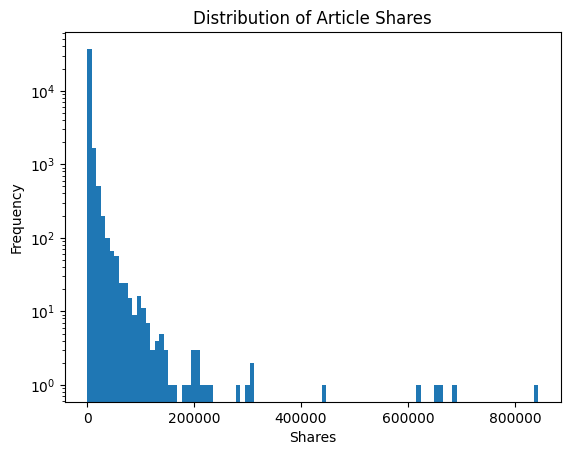

In [81]:
plt.hist(df[' shares'], bins=100)
plt.yscale("log")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.title("Distribution of Article Shares")

Text(0.5, 1.0, 'Distribution of Article Shares (Log Scale)')

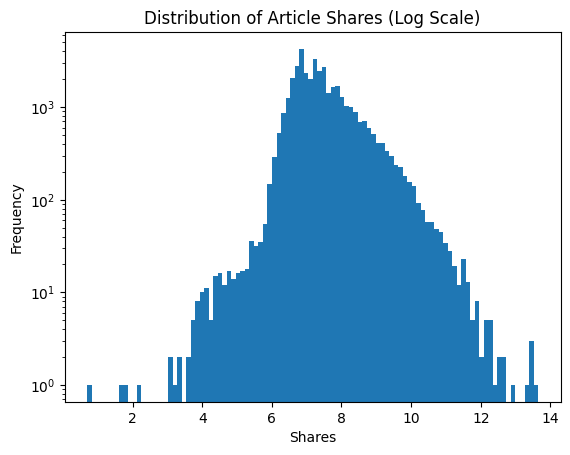

In [84]:
plt.hist(np.log1p(df[' shares']), bins=100)
plt.yscale("log")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.title("Distribution of Article Shares (Log Scale)")

Question: Which type of channel (Lifestyle, Entertainment, Business, Social Media, Tech, or Word) does generate the highest shares?

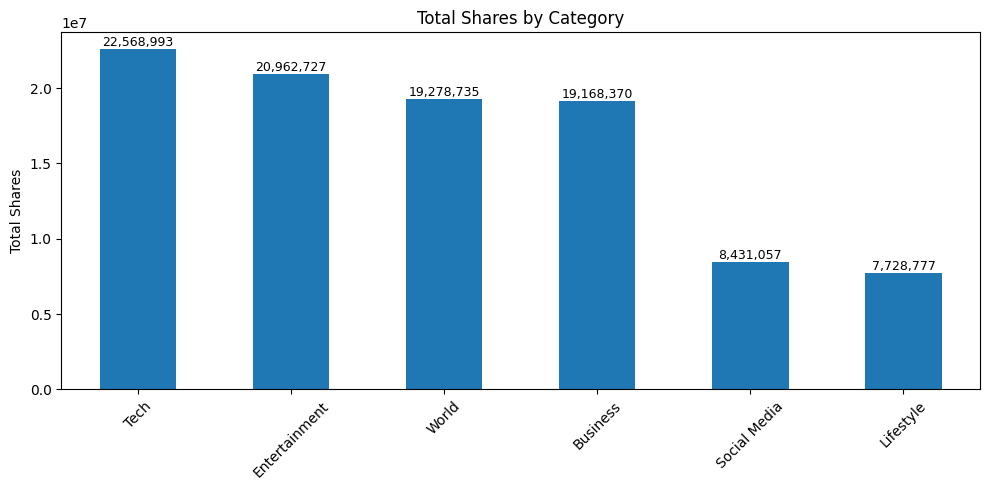

In [76]:
# Number of shares by categories
lifestyle_shares = df[df[' data_channel_is_lifestyle'] == 1][' shares'].sum()
entertainment_shares = df[df[' data_channel_is_entertainment'] == 1][' shares'].sum()
bus_shares = df[df[' data_channel_is_bus'] == 1][' shares'].sum()
socmed_shares = df[df[' data_channel_is_socmed'] == 1][' shares'].sum()
tech_shares = df[df[' data_channel_is_tech'] == 1][' shares'].sum()
world_shares = df[df[' data_channel_is_world'] == 1][' shares'].sum()

# Dataset
df_categories = pd.DataFrame()
df_categories = pd.DataFrame({
    'Category': ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World'],
    'Shares': [lifestyle_shares, entertainment_shares, bus_shares, socmed_shares, tech_shares, world_shares]
})
df_categories

# Visualize
df_categories_sorted = df_categories.sort_values('Shares', ascending=False).reset_index(drop=True)

ax = df_categories_sorted.plot(
    kind='bar',
    x='Category',
    y='Shares',
    legend=False,
    color='C0',
    figsize=(10, 5)
)
ax.set_title('Total Shares by Category')
ax.set_ylabel('Total Shares')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=45)

# annotate bars with formatted numbers
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Question: Are there correlation between number of shares with number of images, number of videos, and number of words in the title?

Text(0.5, 1.0, 'Number of Shares vs. Number of Images')

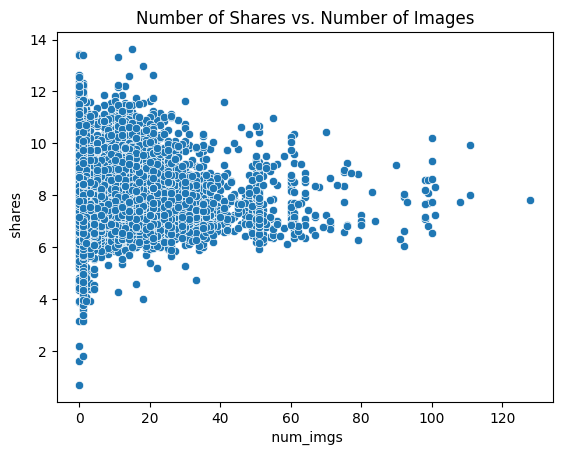

In [77]:
fig, ax = plt.subplots()

ax = sns.scatterplot(
    data= df,
    x = df[' num_imgs'],
    y = np.log1p(df[' shares'])
)
ax.set_title('Number of Shares vs. Number of Images')

Text(0.5, 1.0, 'Number of Shares vs. Number of Videos')

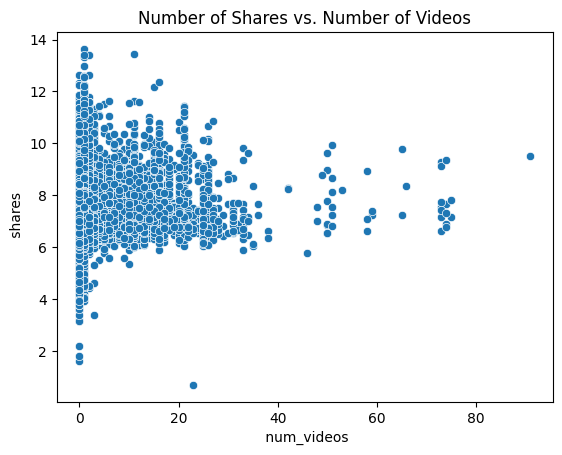

In [78]:
ax = sns.scatterplot(
    data= df,
    x = df[' num_videos'],
    y = np.log1p(df[' shares'])
)
ax.set_title('Number of Shares vs. Number of Videos')

Text(0.5, 1.0, 'Number of Shares vs. Number of words in title')

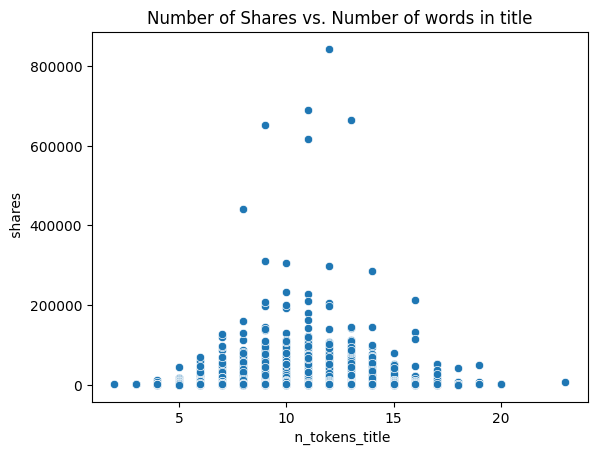

In [79]:
ax = sns.scatterplot(
    data= df,
    x = df[' n_tokens_title'],
    y = df[' shares']
)
ax.set_title('Number of Shares vs. Number of words in title')

Question: How is the correlation between `shares` and other features pair-wise?

In [101]:
df['log_shares'] = np.log1p(df[' shares'])
df.columns

Index(['index', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polari

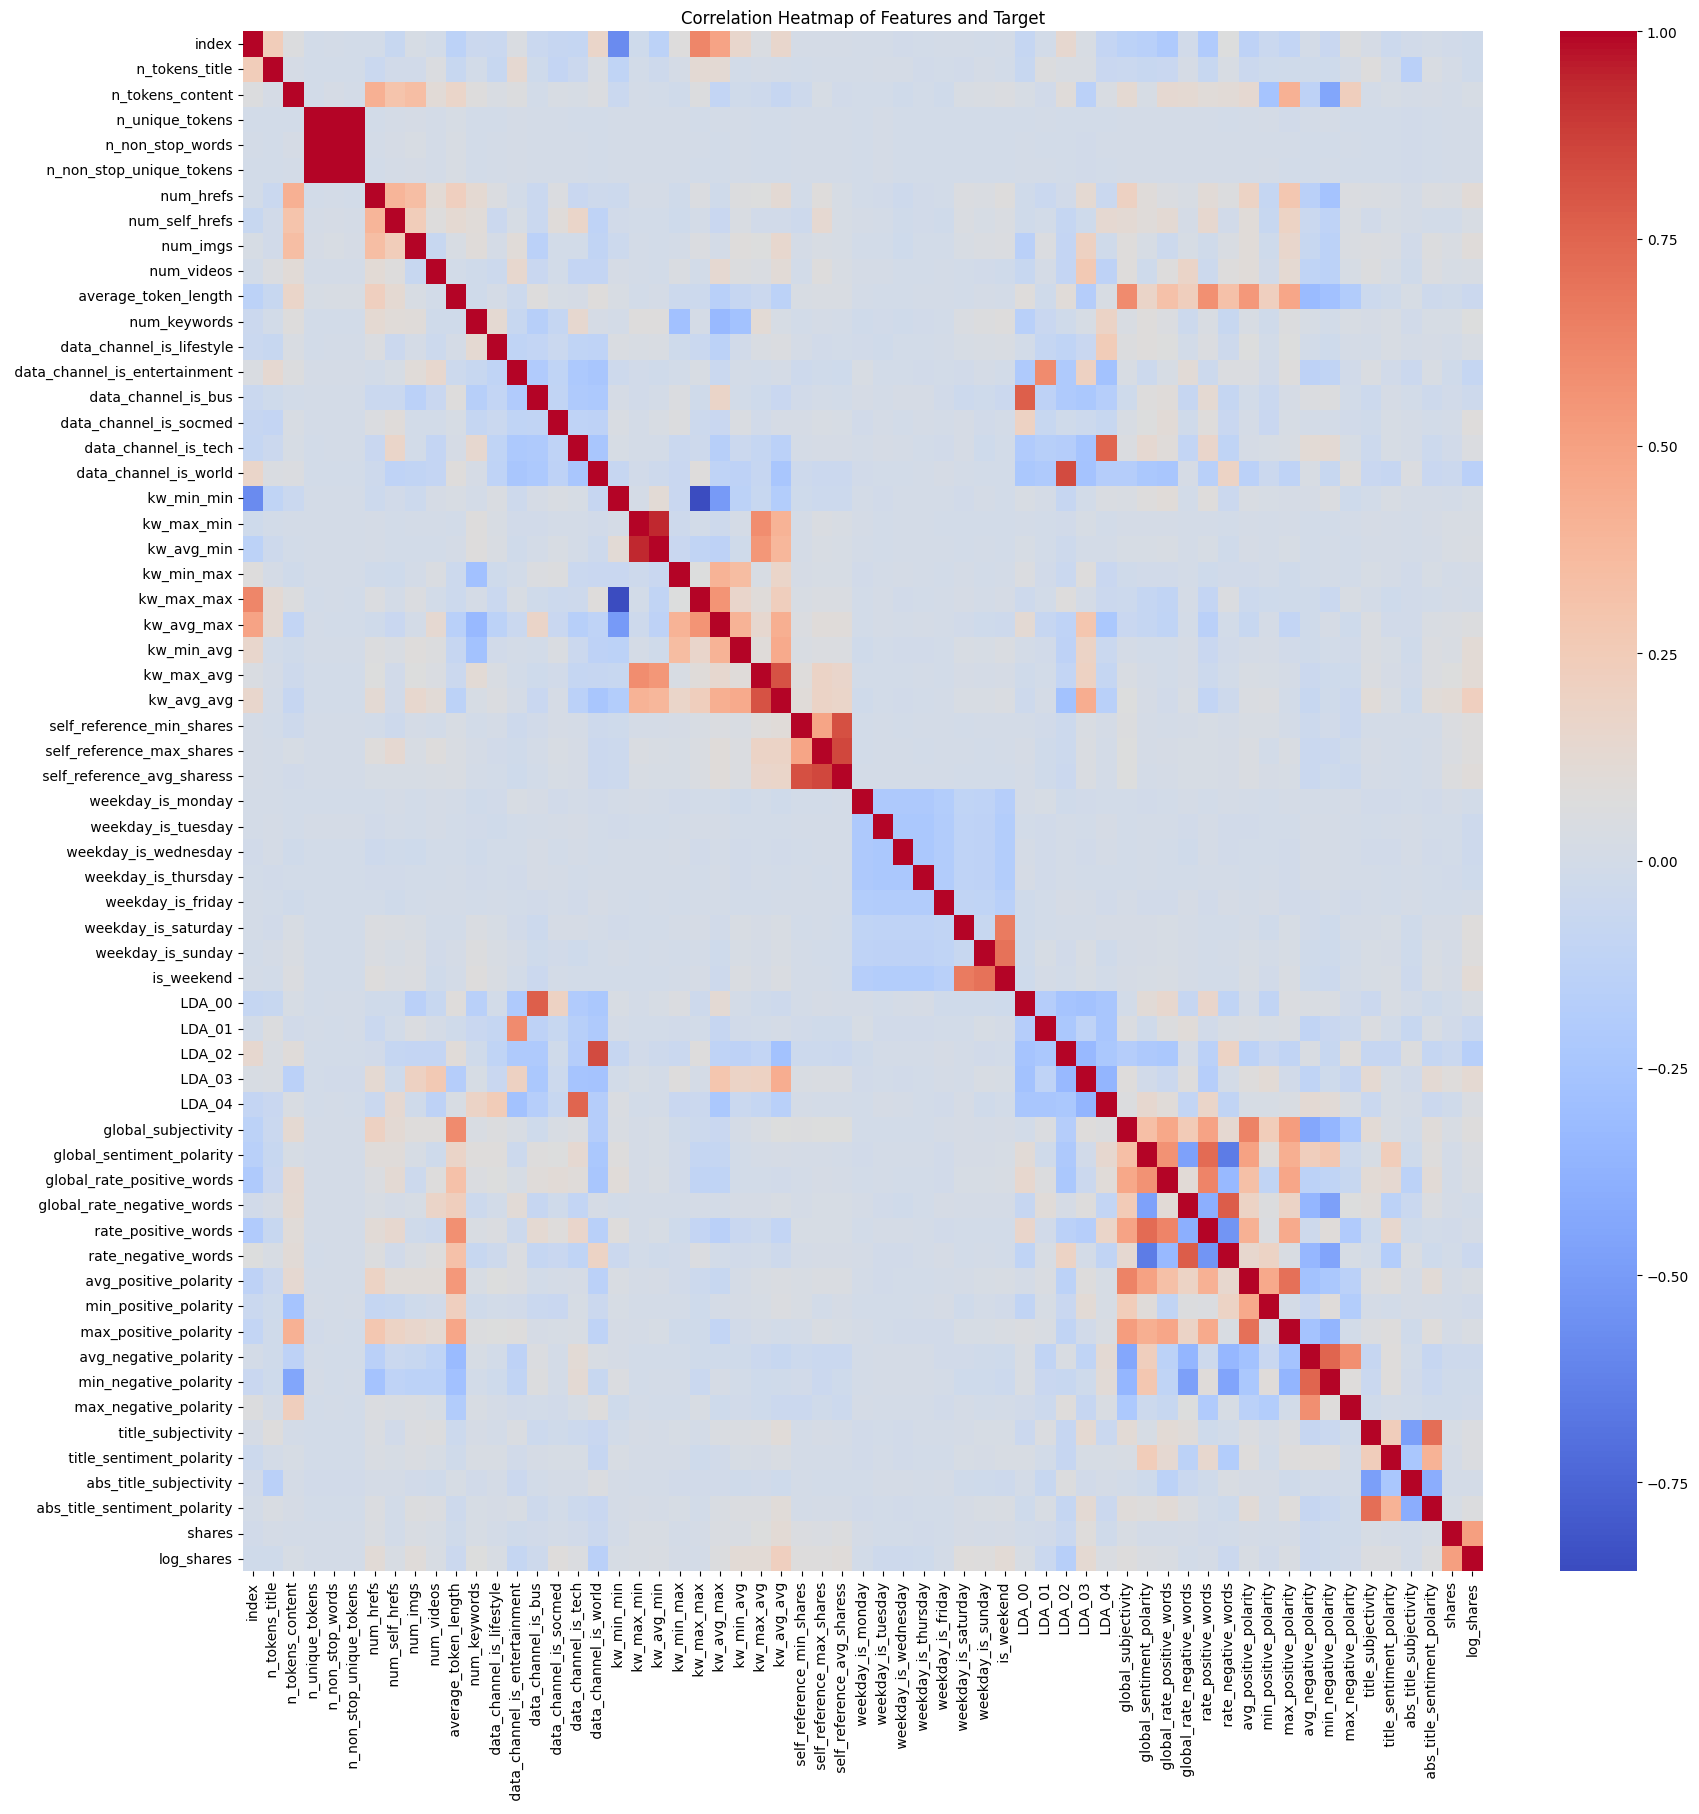

In [102]:
corr_matrix = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features and Target")
plt.show()

In [107]:
corr_w_shares = corr_matrix['log_shares']
pd.set_option("display.max_rows", None)
print(corr_w_shares)

index                            -0.022333
 n_tokens_title                  -0.019048
 n_tokens_content                 0.024846
 n_unique_tokens                  0.004972
 n_non_stop_words                 0.005407
 n_non_stop_unique_tokens         0.003710
 num_hrefs                        0.105142
 num_self_hrefs                   0.029113
 num_imgs                         0.091519
 num_videos                       0.032151
 average_token_length            -0.045321
 num_keywords                     0.065945
 data_channel_is_lifestyle        0.033228
 data_channel_is_entertainment   -0.082531
 data_channel_is_bus             -0.030587
 data_channel_is_socmed           0.081144
 data_channel_is_tech             0.054539
 data_channel_is_world           -0.151685
 kw_min_min                       0.022556
 kw_max_min                       0.033104
 kw_avg_min                       0.039539
 kw_min_max                       0.010531
 kw_max_max                       0.002099
 kw_avg_max

## Key EDA Findings

1. The distribution of article shares is highly skewed,
   suggesting that unconstrained maximization may favor
   a small number of extreme articles.

2. Article topics are unevenly represented, motivating
   explicit diversity constraints in the LP formulation.

3. These observations justify modeling promotion decisions
   as a constrained optimization problem rather than
   simple ranking by predicted popularity.
